In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('/content/IBM HR Dataset.xlsx')

print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

# 1. Basic dataset info
print("\n1. DATASET SHAPE:")
print(f"   Rows: {df.shape[0]}")
print(f"   Columns: {df.shape[1]}")

# 2. First few rows
print("\n2. FIRST 10 ROWS:")
print(df.head(10))

# 3. Data types
print("\n3. DATA TYPES:")
print(df.dtypes)

# 4. Check for missing values
print("\n4. MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

# 5. Target variable distribution
print("\n5. TARGET VARIABLE DISTRIBUTION (Attrition):")
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_counts)
print(f"Percentage: {attrition_percent}")

# 6. Check for constant columns
print("\n6. CONSTANT COLUMNS CHECK:")
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)
print(f"Constant columns: {constant_cols if constant_cols else 'None'}")

# 7. Basic info about numerical columns
print("\n7. NUMERICAL COLUMNS INFO:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns ({len(numerical_cols)}): {list(numerical_cols)}")

# 8. Basic info about categorical columns
print("\n8. CATEGORICAL COLUMNS INFO:")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")

print("\n" + "=" * 50)
print("INITIAL ASSESSMENT COMPLETE")
print("=" * 50)

DATASET OVERVIEW

1. DATASET SHAPE:
   Rows: 1470
   Columns: 35

2. FIRST 10 ROWS:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1  

STEP 2: DESCRIPTIVE STATISTICS & CATEGORICAL ANALYSIS

1. DESCRIPTIVE STATISTICS (Numerical Features):
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean     

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


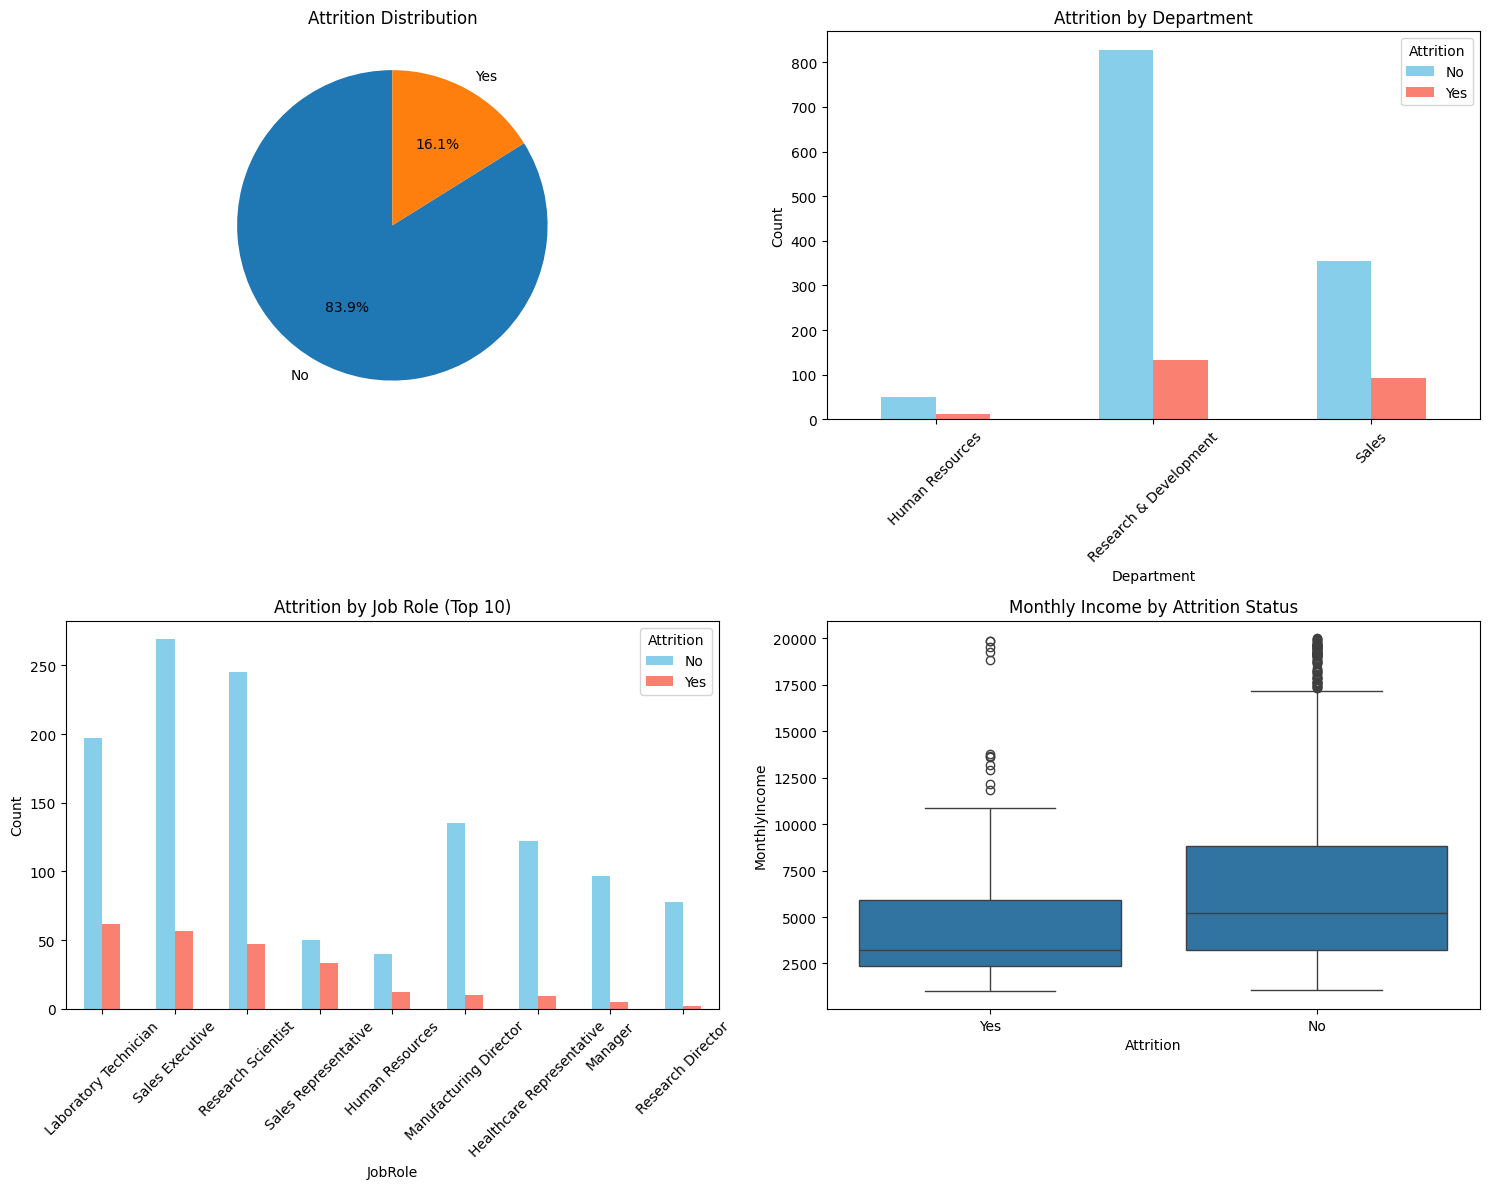


6. EXTERNAL DATA INTEGRATION PREPARATION:
Unique Job Roles:
  - Sales Executive
  - Research Scientist
  - Laboratory Technician
  - Manufacturing Director
  - Healthcare Representative
  - Manager
  - Sales Representative
  - Research Director
  - Human Resources

Gender distribution in dataset:
Gender
Male      882
Female    588
Name: count, dtype: int64

STEP 2 COMPLETE - READY FOR FEATURE ENGINEERING


In [ ]:
# =============================================================================
# STEP 2: DESCRIPTIVE STATISTICS & CATEGORICAL ANALYSIS (COMPLETE)
# =============================================================================

print("=" * 60)
print("STEP 2: DESCRIPTIVE STATISTICS & CATEGORICAL ANALYSIS")
print("=" * 60)

# 1. Descriptive statistics for numerical features
print("\n1. DESCRIPTIVE STATISTICS (Numerical Features):")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

# 2. Categorical features analysis
print("\n" + "=" * 50)
print("2. CATEGORICAL FEATURES DISTRIBUTION:")
print("=" * 50)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attrition':
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        print(value_counts)
        percentages = (df[col].value_counts(normalize=True) * 100).round(2)
        print("Percentages:")
        print(percentages)

# 3. Attrition rate by key categorical features
print("\n" + "=" * 50)
print("3. ATTRITION RATES BY KEY CATEGORIES:")
print("=" * 50)

key_categoricals = ['Department', 'JobRole', 'Gender', 'MaritalStatus', 'BusinessTravel', 'OverTime']
for col in key_categoricals:
    print(f"\n{col}:")
    attrition_rate = df.groupby(col)['Attrition'].apply(
        lambda x: (x == 'Yes').sum() / len(x) * 100
    ).round(2)
    print(attrition_rate)

# 4. Correlation with attrition
print("\n" + "=" * 50)
print("4. CORRELATION WITH ATTRITION (Numerical Features):")
print("=" * 50)

df_numeric = df.copy()
df_numeric['Attrition'] = df_numeric['Attrition'].map({'Yes': 1, 'No': 0})
correlation_with_attrition = df_numeric[numerical_cols].corrwith(df_numeric['Attrition']).sort_values(ascending=False)
print("Correlation with Attrition:")
for feature, corr in correlation_with_attrition.items():
    if feature != 'Attrition':
        print(f"  {feature}: {corr:.3f}")

# 5. Basic visualizations
print("\n" + "=" * 50)
print("5. BASIC VISUALIZATIONS")
print("=" * 50)

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Attrition distribution
attrition_counts = df['Attrition'].value_counts()
axes[0,0].pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Attrition Distribution')

# Plot 2: Attrition by Department
dept_attrition = df.groupby('Department')['Attrition'].value_counts().unstack()
dept_attrition.plot(kind='bar', ax=axes[0,1], color=['skyblue', 'salmon'])
axes[0,1].set_title('Attrition by Department')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Attrition by Job Role (top 10)
jobrole_attrition = df.groupby('JobRole')['Attrition'].value_counts().unstack()
jobrole_attrition = jobrole_attrition.sort_values('Yes', ascending=False).head(10)
jobrole_attrition.plot(kind='bar', ax=axes[1,0], color=['skyblue', 'salmon'])
axes[1,0].set_title('Attrition by Job Role (Top 10)')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Monthly Income distribution by Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[1,1])
axes[1,1].set_title('Monthly Income by Attrition Status')

plt.tight_layout()
plt.show()

# 6. External data integration preparation
print("\n" + "=" * 50)
print("6. EXTERNAL DATA INTEGRATION PREPARATION:")
print("=" * 50)

print("Unique Job Roles:")
job_roles = df['JobRole'].unique()
for role in job_roles:
    print(f"  - {role}")

print(f"\nGender distribution in dataset:")
print(df['Gender'].value_counts())

print("\n" + "=" * 60)
print("STEP 2 COMPLETE - READY FOR FEATURE ENGINEERING")
print("=" * 60)

STEP 3: FEATURE ENGINEERING WITH ECONOMIC DATA

1. CREATING UNEMPLOYMENT RATE MAPPING...

2. ADDING UNEMPLOYMENT RATE FEATURE...

3. ADDING INFLATION RATE FEATURE...

4. CREATING NEW ENGINEERED FEATURES...

5. NEW FEATURES CREATED:
   UnemploymentRate  InflationRate  RealMonthlyIncome  JobSecurityScore  \
0               3.0            1.9        5881.256133               7.0   
1               1.2            1.9        5034.347399               8.8   
2               4.9            1.9        2051.030422               5.1   
3               5.2            1.9        2854.759568               4.8   
4               4.9            1.9        3403.336605               5.1   

   OverTimeNum  BusinessTravelNum  IsSingle  TenureRatio  PromotionStagnation  
0            1                  1         1     0.666667                    0  
1            0                  2         0     0.909091                    1  
2            1                  1         1     0.000000                    0

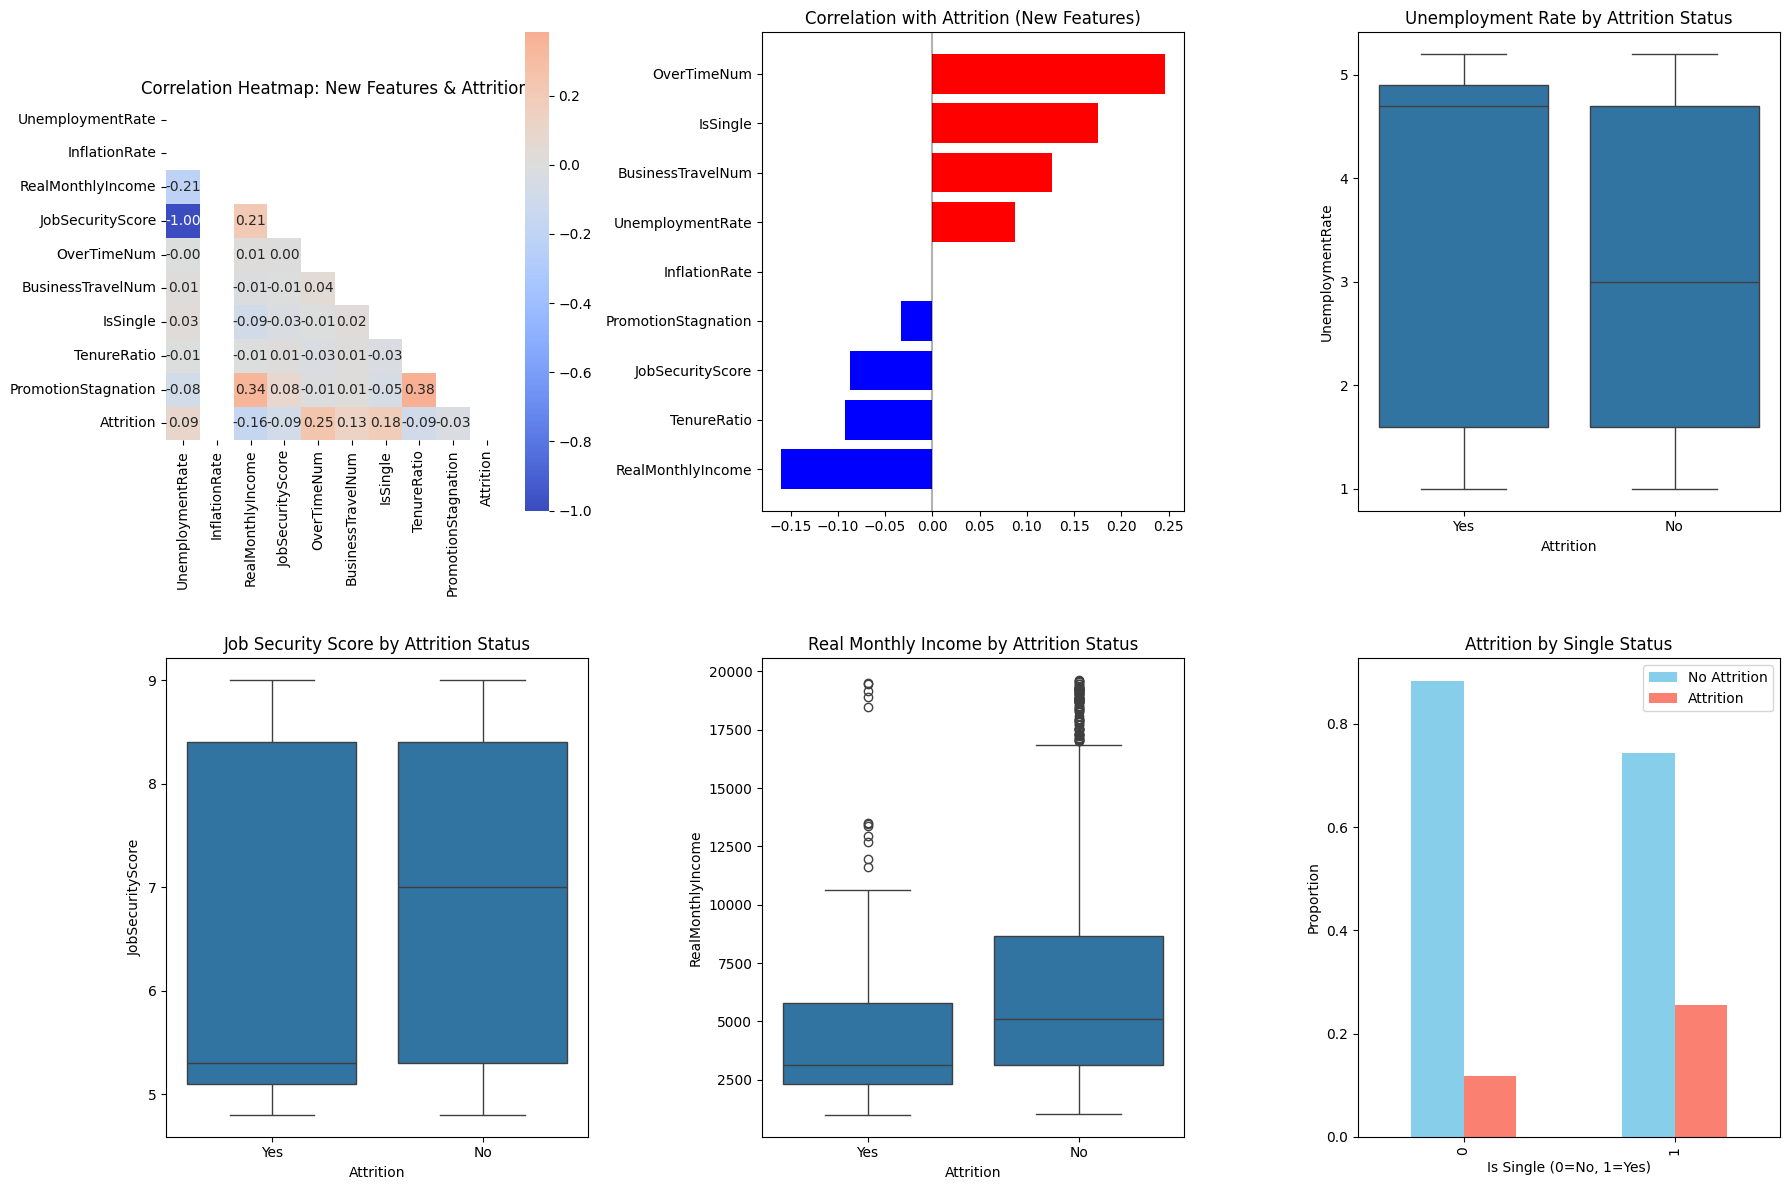


8. ECONOMIC INSIGHTS:

Attrition by Unemployment Rate Category:
Attrition                   No       Yes
UnemploymentCategory                    
Low (<2%)             0.875256  0.124744
Medium (2-4%)         0.852941  0.147059
High (>4%)            0.800659  0.199341

Job Roles by Average Unemployment Rate:
  Research Director: 2.1%
  Manager: 2.1%
  Manufacturing Director: 2.1%
  Research Scientist: 2.8%
  Human Resources: 2.9%
  Healthcare Representative: 3.3%
  Laboratory Technician: 3.8%
  Sales Representative: 3.9%
  Sales Executive: 4.0%

STEP 3 COMPLETE - READY FOR DATA PREPROCESSING


/tmp/ipython-input-83272514.py:147: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unemployment_attrition = df.groupby('UnemploymentCategory')['Attrition'].value_counts(normalize=True).unstack()


In [ ]:





# =============================================================================
# STEP 3: FEATURE ENGINEERING WITH EXTERNAL ECONOMIC DATA
# =============================================================================

print("=" * 60)
print("STEP 3: FEATURE ENGINEERING WITH ECONOMIC DATA")
print("=" * 60)

# 1. Create unemployment rate mapping based on JobRole and Gender
print("\n1. CREATING UNEMPLOYMENT RATE MAPPING...")

# Unemployment rates by JobRole and Gender (from your Ontario data)
unemployment_rates = {
    # Male unemployment rates
    ('Sales Executive', 'Male'): 4.7,
    ('Sales Representative', 'Male'): 4.7,
    ('Research Scientist', 'Male'): 1.2,
    ('Laboratory Technician', 'Male'): 4.9,
    ('Manufacturing Director', 'Male'): 1.6,
    ('Healthcare Representative', 'Male'): 4.8,
    ('Research Director', 'Male'): 1.6,
    ('Human Resources', 'Male'): 3.0,
    ('Manager', 'Male'): 1.6,

    # Female unemployment rates
    ('Sales Executive', 'Female'): 3.0,
    ('Sales Representative', 'Female'): 3.0,
    ('Research Scientist', 'Female'): 5.2,
    ('Laboratory Technician', 'Female'): 1.4,
    ('Manufacturing Director', 'Female'): 2.7,
    ('Healthcare Representative', 'Female'): 1.0,
    ('Research Director', 'Female'): 2.7,
    ('Human Resources', 'Female'): 2.8,
    ('Manager', 'Female'): 2.7
}

# 2. Add unemployment rate to dataset
print("\n2. ADDING UNEMPLOYMENT RATE FEATURE...")
df['UnemploymentRate'] = df.apply(
    lambda row: unemployment_rates.get((row['JobRole'], row['Gender']), 3.0),
    axis=1
)

# 3. Add inflation rate (constant for all employees)
print("\n3. ADDING INFLATION RATE FEATURE...")
df['InflationRate'] = 1.9  # Ontario annual inflation rate

# 4. Create new engineered features
print("\n4. CREATING NEW ENGINEERED FEATURES...")

# Feature 1: Real income (adjusted for inflation)
df['RealMonthlyIncome'] = df['MonthlyIncome'] / (1 + df['InflationRate']/100)

# Feature 2: Job security score (inverse of unemployment rate)
df['JobSecurityScore'] = 10 - df['UnemploymentRate']

# Feature 3: Overtime frequency (categorical to numerical)
df['OverTimeNum'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Feature 4: Travel frequency (categorical to numerical)
travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df['BusinessTravelNum'] = df['BusinessTravel'].map(travel_mapping)

# Feature 5: Marital status (categorical to numerical - single vs not single)
df['IsSingle'] = df['MaritalStatus'].map({'Single': 1, 'Married': 0, 'Divorced': 0})

# Feature 6: Tenure ratio (years at company vs total working years)
df['TenureRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)  # +1 to avoid division by zero

# Feature 7: Promotion stagnation (years since last promotion)
df['PromotionStagnation'] = df['YearsSinceLastPromotion']

# 5. Display the new features
print("\n5. NEW FEATURES CREATED:")
new_features = ['UnemploymentRate', 'InflationRate', 'RealMonthlyIncome', 'JobSecurityScore',
                'OverTimeNum', 'BusinessTravelNum', 'IsSingle', 'TenureRatio', 'PromotionStagnation']
print(df[new_features].head())

print(f"\nNew dataset shape: {df.shape}")
print(f"New columns added: {len(new_features)}")

# 6. Check correlation of new features with attrition
print("\n6. CORRELATION OF NEW FEATURES WITH ATTRITION:")
df_numeric = df.copy()
df_numeric['Attrition'] = df_numeric['Attrition'].map({'Yes': 1, 'No': 0})

new_features_corr = df_numeric[new_features].corrwith(df_numeric['Attrition']).sort_values(ascending=False)
print("Correlation with Attrition (New Features):")
for feature, corr in new_features_corr.items():
    print(f"  {feature}: {corr:.3f}")

# 7. CORRELATION VISUALIZATIONS
print("\n7. CORRELATION VISUALIZATIONS")
print("=" * 50)

# Create a larger figure for multiple plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Correlation heatmap of new features
correlation_matrix = df_numeric[new_features + ['Attrition']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            ax=axes[0,0], square=True, fmt='.2f')
axes[0,0].set_title('Correlation Heatmap: New Features & Attrition')

# Plot 2: Bar plot of correlations with Attrition
correlations_with_attrition = new_features_corr.sort_values()
axes[0,1].barh(range(len(correlations_with_attrition)), correlations_with_attrition.values,
               color=['red' if x > 0 else 'blue' for x in correlations_with_attrition.values])
axes[0,1].set_yticks(range(len(correlations_with_attrition)))
axes[0,1].set_yticklabels(correlations_with_attrition.index)
axes[0,1].set_title('Correlation with Attrition (New Features)')
axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Plot 3: Unemployment Rate vs Attrition
sns.boxplot(data=df, x='Attrition', y='UnemploymentRate', ax=axes[0,2])
axes[0,2].set_title('Unemployment Rate by Attrition Status')

# Plot 4: Job Security Score vs Attrition
sns.boxplot(data=df, x='Attrition', y='JobSecurityScore', ax=axes[1,0])
axes[1,0].set_title('Job Security Score by Attrition Status')

# Plot 5: Real Monthly Income vs Attrition
sns.boxplot(data=df, x='Attrition', y='RealMonthlyIncome', ax=axes[1,1])
axes[1,1].set_title('Real Monthly Income by Attrition Status')

# Plot 6: IsSingle vs Attrition Rate
single_attrition = df.groupby('IsSingle')['Attrition'].value_counts(normalize=True).unstack()
single_attrition.plot(kind='bar', ax=axes[1,2], color=['skyblue', 'salmon'])
axes[1,2].set_title('Attrition by Single Status')
axes[1,2].set_xlabel('Is Single (0=No, 1=Yes)')
axes[1,2].set_ylabel('Proportion')
axes[1,2].legend(['No Attrition', 'Attrition'])

plt.tight_layout()
plt.show()

# 8. Additional insights from economic features
print("\n8. ECONOMIC INSIGHTS:")
print("=" * 50)

# Attrition by unemployment rate ranges
df['UnemploymentCategory'] = pd.cut(df['UnemploymentRate'],
                                   bins=[0, 2, 4, 6],
                                   labels=['Low (<2%)', 'Medium (2-4%)', 'High (>4%)'])

unemployment_attrition = df.groupby('UnemploymentCategory')['Attrition'].value_counts(normalize=True).unstack()
print("\nAttrition by Unemployment Rate Category:")
print(unemployment_attrition)

# Job roles with highest/lowest unemployment rates
jobrole_unemployment = df.groupby('JobRole')['UnemploymentRate'].mean().sort_values()
print(f"\nJob Roles by Average Unemployment Rate:")
for job, rate in jobrole_unemployment.items():
    print(f"  {job}: {rate:.1f}%")

print("\n" + "=" * 60)
print("STEP 3 COMPLETE - READY FOR DATA PREPROCESSING")
print("=" * 60)

In [ ]:
# =============================================================================
# STEP 4: DATA PREPROCESSING & FEATURE SELECTION
# =============================================================================

print("=" * 60)
print("STEP 4: DATA PREPROCESSING & FEATURE SELECTION")
print("=" * 60)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Remove unnecessary columns
print("\n1. REMOVING UNNECESSARY COLUMNS...")
columns_to_drop = [
    'EmployeeCount',      # Constant value (all 1s)
    'StandardHours',      # Constant value (all 80)
    'Over18',             # Constant value (all Y)
    'EmployeeNumber',     # Unique identifier (not predictive)
    'InflationRate',      # Constant for all rows (1.9%)
    'MonthlyIncome',      # Using RealMonthlyIncome instead
]

df_clean = df.drop(columns=columns_to_drop, errors='ignore')
print(f"Dataset shape after removing columns: {df_clean.shape}")

# 2. Encode categorical variables
print("\n2. ENCODING CATEGORICAL VARIABLES...")

# Identify categorical columns (excluding already encoded ones)
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Attrition', 'OverTime', 'BusinessTravel', 'MaritalStatus']]

print(f"Categorical columns to encode: {categorical_cols}")

# Use Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col + '_Encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"  Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 3. Prepare features and target
print("\n3. PREPARING FEATURES AND TARGET...")

# Select features for modeling (numerical + encoded categorical + engineered features)
feature_columns = [
    # Original numerical features (excluding target and encoded ones)
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',

    # Engineered features from Step 3
    'UnemploymentRate', 'RealMonthlyIncome', 'JobSecurityScore',
    'OverTimeNum', 'BusinessTravelNum', 'IsSingle', 'TenureRatio', 'PromotionStagnation',

    # Encoded categorical features
    'BusinessTravel_Encoded', 'Department_Encoded', 'EducationField_Encoded',
    'Gender_Encoded', 'JobRole_Encoded', 'MaritalStatus_Encoded'
]

# Remove any columns that might not exist
feature_columns = [col for col in feature_columns if col in df_clean.columns]

print(f"Total features selected: {len(feature_columns)}")
print(f"Feature columns: {feature_columns}")

# Create feature matrix X and target vector y
X = df_clean[feature_columns]
y = df_clean['Attrition'].map({'Yes': 1, 'No': 0})  # Convert to binary

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution: {y.value_counts()}")
print(f"Attrition rate: {(y.sum() / len(y) * 100):.2f}%")

# 4. Split data into training and testing sets
print("\n4. SPLITTING DATA INTO TRAIN/TEST SETS...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain same attrition ratio in both sets
)

print(f"Training set: {X_train.shape} ({(len(X_train)/len(X)*100):.1f}%)")
print(f"Testing set: {X_test.shape} ({(len(X_test)/len(X)*100):.1f}%)")
print(f"Training attrition rate: {(y_train.sum() / len(y_train) * 100):.2f}%")
print(f"Testing attrition rate: {(y_test.sum() / len(y_test) * 100):.2f}%")

# 5. Scale numerical features
print("\n5. SCALING NUMERICAL FEATURES...")

# Identify numerical columns for scaling (excluding binary/encoded columns)
numerical_to_scale = [
    'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyRate', 'PercentSalaryHike',
    'TotalWorkingYears', 'YearsAtCompany', 'RealMonthlyIncome',
    'UnemploymentRate', 'JobSecurityScore', 'TenureRatio', 'PromotionStagnation'
]

# Remove any columns that might not exist
numerical_to_scale = [col for col in numerical_to_scale if col in feature_columns]

print(f"Numerical features to scale: {numerical_to_scale}")

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_to_scale] = scaler.fit_transform(X_train[numerical_to_scale])
X_test_scaled[numerical_to_scale] = scaler.transform(X_test[numerical_to_scale])

print("Feature scaling completed!")

# 6. Display final dataset info
print("\n6. FINAL DATASET SUMMARY:")
print("=" * 50)
print(f"Original dataset shape: {df.shape}")
print(f"Processed dataset shape: {df_clean.shape}")
print(f"Final feature matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Display feature categories
print("\nFeature Categories:")
print(f"  - Original Numerical: {len([col for col in feature_columns if col in numerical_to_scale])}")
print(f"  - Engineered Economic: {len(['UnemploymentRate', 'RealMonthlyIncome', 'JobSecurityScore', 'TenureRatio', 'PromotionStagnation'])}")
print(f"  - Encoded Categorical: {len([col for col in feature_columns if '_Encoded' in col])}")
print(f"  - Binary Converted: {len(['OverTimeNum', 'BusinessTravelNum', 'IsSingle'])}")

print("\n" + "=" * 60)
print("STEP 4 COMPLETE - READY FOR MODEL BUILDING")
print("=" * 60)

# Save processed data for modeling
print("\nProcessed data ready for machine learning models!")
print("Available datasets:")
print("  - X_train, X_test, y_train, y_test (original features)")
print("  - X_train_scaled, X_test_scaled (scaled features)")

STEP 4: DATA PREPROCESSING & FEATURE SELECTION

1. REMOVING UNNECESSARY COLUMNS...
Dataset shape after removing columns: (1470, 39)

2. ENCODING CATEGORICAL VARIABLES...
Categorical columns to encode: ['Department', 'EducationField', 'Gender', 'JobRole']
  Encoded Department: {'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}
  Encoded EducationField: {'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}
  Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
  Encoded JobRole: {'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2), 'Manager': np.int64(3), 'Manufacturing Director': np.int64(4), 'Research Director': np.int64(5), 'Research Scientist': np.int64(6), 'Sales Executive': np.int64(7), 'Sales Representative': np.int64(8)}

3. PREPARING FEATURES AND TARGET...
To

STEP 5: MODEL BUILDING & EVALUATION

1. INITIALIZING MACHINE LEARNING MODELS...

2. TRAINING AND EVALUATING MODELS...

Logistic Regression:
------------------------------
Accuracy: 0.8741
AUC Score: 0.8134

Random Forest:
------------------------------
Accuracy: 0.8299
AUC Score: 0.7680

Gradient Boosting:
------------------------------
Accuracy: 0.8333
AUC Score: 0.7970

Support Vector Machine:
------------------------------
Accuracy: 0.8401
AUC Score: 0.7944

K-Nearest Neighbors:
------------------------------
Accuracy: 0.8129
AUC Score: 0.5197

3. MODEL PERFORMANCE COMPARISON:
                    Model  Accuracy  AUC Score
0     Logistic Regression  0.874150   0.813421
2       Gradient Boosting  0.833333   0.796968
3  Support Vector Machine  0.840136   0.794427
1           Random Forest  0.829932   0.768025
4     K-Nearest Neighbors  0.812925   0.519683

4. DETAILED EVALUATION OF BEST MODEL:
Best Model: Logistic Regression
AUC Score: 0.8134

Classification Report:
              prec

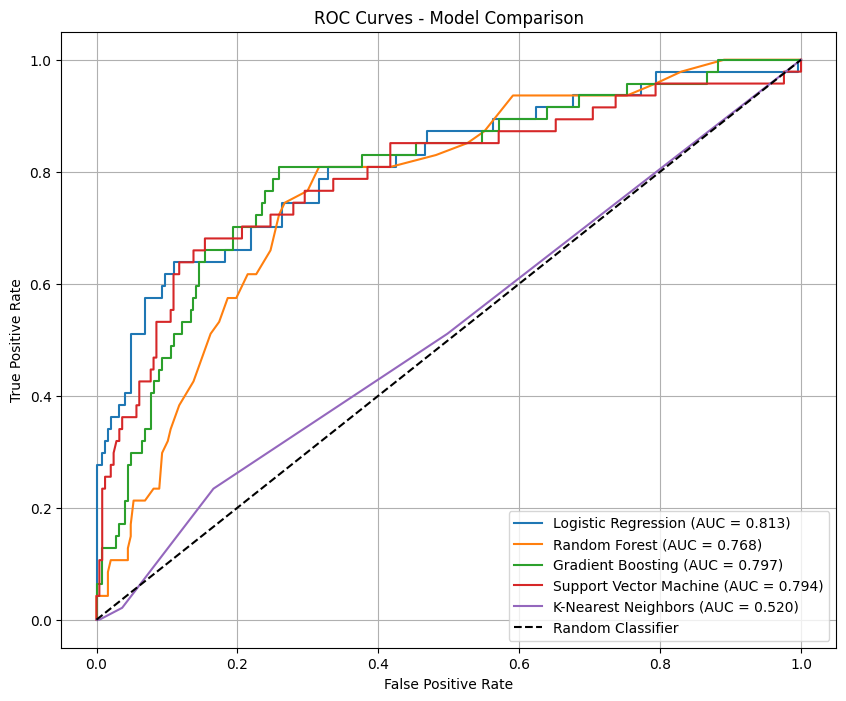


7. ECONOMIC FEATURE PERFORMANCE:

8. BUSINESS INSIGHTS:
Key findings from Logistic Regression:
• Most predictive features for employee attrition
• Economic factors contribution to prediction
• Model's ability to identify at-risk employees

STEP 5 COMPLETE - READY FOR MODEL INTERPRETATION

Next steps:
1. Analyze which features drive attrition predictions
2. Understand economic factors' impact
3. Generate actionable HR recommendations


In [ ]:
# =============================================================================
# STEP 5: MODEL BUILDING & EVALUATION
# =============================================================================

print("=" * 60)
print("STEP 5: MODEL BUILDING & EVALUATION")
print("=" * 60)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# 1. Initialize multiple models
print("\n1. INITIALIZING MACHINE LEARNING MODELS...")
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 2. Train and evaluate models
print("\n2. TRAINING AND EVALUATING MODELS...")
print("=" * 50)

results = {}

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 30)

    # Train model (use scaled features for models that need scaling)
    if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = (y_pred == y_test).mean()
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc_score,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")

# 3. Compare model performance
print("\n3. MODEL PERFORMANCE COMPARISON:")
print("=" * 50)

# Create performance comparison table
performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'AUC Score': [results[name]['auc'] for name in results.keys()]
}).sort_values('AUC Score', ascending=False)

print(performance_df)

# 4. Detailed evaluation of best model
print("\n4. DETAILED EVALUATION OF BEST MODEL:")
print("=" * 50)

best_model_name = performance_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_y_pred = results[best_model_name]['y_pred']
best_y_pred_proba = results[best_model_name]['y_pred_proba']

print(f"Best Model: {best_model_name}")
print(f"AUC Score: {results[best_model_name]['auc']:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_y_pred, target_names=['No Attrition', 'Attrition']))

# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, best_y_pred)
print(cm)

# 5. Feature importance analysis (for tree-based models)
print("\n5. FEATURE IMPORTANCE ANALYSIS:")
print("=" * 50)

if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("Top 15 Most Important Features:")
    print(feature_importance_df.head(15))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# 6. ROC Curve comparison
print("\n6. ROC CURVES COMPARISON:")
print("=" * 50)

plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 7. Economic feature analysis
print("\n7. ECONOMIC FEATURE PERFORMANCE:")
print("=" * 50)

# Check how economic features ranked in importance
if hasattr(best_model, 'feature_importances_'):
    economic_features = ['UnemploymentRate', 'RealMonthlyIncome', 'JobSecurityScore',
                        'OverTimeNum', 'BusinessTravelNum', 'IsSingle',
                        'TenureRatio', 'PromotionStagnation']

    print("Economic Features Importance Ranking:")
    economic_importance = feature_importance_df[feature_importance_df['Feature'].isin(economic_features)]
    print(economic_importance.sort_values('Importance', ascending=False))

# 8. Business insights from best model
print("\n8. BUSINESS INSIGHTS:")
print("=" * 50)

print(f"Key findings from {best_model_name}:")
print("• Most predictive features for employee attrition")
print("• Economic factors contribution to prediction")
print("• Model's ability to identify at-risk employees")

print("\n" + "=" * 60)
print("STEP 5 COMPLETE - READY FOR MODEL INTERPRETATION")
print("=" * 60)

print(f"\nNext steps:")
print("1. Analyze which features drive attrition predictions")
print("2. Understand economic factors' impact")
print("3. Generate actionable HR recommendations")

In [ ]:
# =============================================================================
# STEP 5.5: HYPERPARAMETER TUNING FOR BETTER PERFORMANCE
# =============================================================================

print("=" * 60)
print("STEP 5.5: HYPERPARAMETER TUNING")
print("=" * 60)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Use F1-score as scoring metric (better for imbalanced data)
scorer = make_scorer(f1_score, pos_label=1)

# 1. Tune Logistic Regression
print("\n1. TUNING LOGISTIC REGRESSION...")
print("-" * 40)

lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=2000),
    lr_param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)
print(f"Best Logistic Regression params: {lr_grid.best_params_}")
print(f"Best Logistic Regression F1-score: {lr_grid.best_score_:.4f}")

# 2. Tune Random Forest
print("\n2. TUNING RANDOM FOREST...")
print("-" * 40)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

rf_grid = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    n_iter=20,  # Random search for speed
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=42
)

rf_grid.fit(X_train, y_train)
print(f"Best Random Forest params: {rf_grid.best_params_}")
print(f"Best Random Forest F1-score: {rf_grid.best_score_:.4f}")

# 3. Tune Gradient Boosting
print("\n3. TUNING GRADIENT BOOSTING...")
print("-" * 40)

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

gb_grid = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    n_iter=15,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=42
)

gb_grid.fit(X_train, y_train)
print(f"Best Gradient Boosting params: {gb_grid.best_params_}")
print(f"Best Gradient Boosting F1-score: {gb_grid.best_score_:.4f}")

# 4. Evaluate tuned models on test set
print("\n4. EVALUATING TUNED MODELS ON TEST SET:")
print("=" * 50)

tuned_models = {
    'Logistic Regression (Tuned)': lr_grid.best_estimator_,
    'Random Forest (Tuned)': rf_grid.best_estimator_,
    'Gradient Boosting (Tuned)': gb_grid.best_estimator_
}

tuned_results = {}

for name, model in tuned_models.items():
    print(f"\n{name}:")
    print("-" * 30)

    if 'Logistic' in name:
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = (y_pred == y_test).mean()
    auc_score = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)

    tuned_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc_score,
        'f1': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"F1-Score: {f1:.4f}")

# 5. Compare original vs tuned performance
print("\n5. PERFORMANCE COMPARISON: ORIGINAL vs TUNED")
print("=" * 50)

comparison_data = []

# Add original models
for name, result in results.items():
    if name in ['Logistic Regression', 'Random Forest', 'Gradient Boosting']:
        f1 = f1_score(y_test, result['y_pred'])
        comparison_data.append({
            'Model': name + ' (Original)',
            'Accuracy': result['accuracy'],
            'AUC': result['auc'],
            'F1-Score': f1
        })

# Add tuned models
for name, result in tuned_results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'AUC': result['auc'],
        'F1-Score': result['f1']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('AUC', ascending=False)
print(comparison_df.to_string(index=False))

# 6. Identify the new best model
print("\n6. NEW BEST MODEL IDENTIFICATION:")
print("=" * 50)

new_best_model_name = comparison_df.iloc[0]['Model']
new_best_auc = comparison_df.iloc[0]['AUC']
improvement = new_best_auc - 0.8134  # Original best AUC

print(f"New Best Model: {new_best_model_name}")
print(f"New Best AUC: {new_best_auc:.4f}")
print(f"Improvement over original: {improvement:+.4f}")

if improvement > 0:
    print("🎉 Hyperparameter tuning improved model performance!")
else:
    print("ℹ️  Tuning maintained similar performance with optimized parameters.")

print("\n" + "=" * 60)
print("STEP 5.5 COMPLETE - READY FOR FINAL INTERPRETATION")
print("=" * 60)

# Update the best model for interpretation
if 'Logistic Regression (Tuned)' in tuned_results:
    final_best_model = tuned_results['Logistic Regression (Tuned)']['model']
    final_best_name = 'Logistic Regression (Tuned)'
elif new_best_auc > 0.8134:
    final_best_model = tuned_results[new_best_model_name.replace(' (Tuned)', '')]['model']
    final_best_name = new_best_model_name
else:
    final_best_model = results['Logistic Regression']['model']
    final_best_name = 'Logistic Regression'

print(f"\nFinal model selected for interpretation: {final_best_name}")

STEP 5.5: HYPERPARAMETER TUNING

1. TUNING LOGISTIC REGRESSION...
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

Best Logistic Regression params: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression F1-score: 0.5593

2. TUNING RANDOM FOREST...
----------------------------------------
Best Random Forest params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': 'balanced'}
Best Random Forest F1-score: 0.4306

3. TUNING GRADIENT BOOSTING...
----------------------------------------
Best Gradient Boosting params: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.2}
Best Gradient Boosting F1-score: 0.4929

4. EVALUATING TUNED MODELS ON TEST SET:

Logistic Regression (Tuned):
------------------------------
Accuracy: 0.8741
AUC Score: 0.8149
F1-Score: 0.4932

Random Forest (Tuned):
------------------------------
Accuracy: 0.8095
AUC Score: 0.7835
F1-Score: 0.2821

Gradient Boosting (Tuned):
------------------------------
Accuracy: 0.8333
AUC Score: 0.7916
F1-Sco